In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from dnetworks.model import NNet
from dnetworks.layers import (
    LinearLayer, 
    LeakyReLU, 
    Sigmoid,
    BCELoss, 
    Conv2D,
    MaxPooling2D, 
    AveragePooling2D,
    Flatten
)
from dnetworks.optimizers import Adam

### Dataset

In [3]:
# initialize the parameters of the dataset
n_samples = 10000
noise = 6
random_state = 1

# Create the dataset
x, y = make_classification(
    n_samples=n_samples, random_state=random_state
)
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.4, random_state=1
)

### Model

In [5]:
# Initialize the model
model = NNet()

# Create the model structure
model.add(LinearLayer(x.shape[1], 20))
model.add(LeakyReLU())
 
model.add(LinearLayer(20,7))
model.add(LeakyReLU())
 
model.add(LinearLayer(7, 5))
model.add(LeakyReLU())
 
model.add(LinearLayer(5,1))
model.add(Sigmoid())

# set the loss functions and the optimize method
loss = BCELoss()
optim = Adam()

In [7]:
# Train the model
costs = []

for epoch in range(7000):
    model.forward(x_train.T)
    cost = model.loss(y_train, loss)
    model.backward()
    model.optimize(optim)

    if epoch % 100 == 0:
        print ("Cost after iteration %epoch: %f" %(epoch, cost))
        costs.append(cost)

Cost after iteration 0.000000e+00poch: 0.734081
Cost after iteration 1.000000e+02poch: 0.144793
Cost after iteration 2.000000e+02poch: 0.102105
Cost after iteration 3.000000e+02poch: 0.066322
Cost after iteration 4.000000e+02poch: 0.045945
Cost after iteration 5.000000e+02poch: 0.036492
Cost after iteration 6.000000e+02poch: 0.030386
Cost after iteration 7.000000e+02poch: 0.026186
Cost after iteration 8.000000e+02poch: 0.022418
Cost after iteration 9.000000e+02poch: 0.019751
Cost after iteration 1.000000e+03poch: 0.017645
Cost after iteration 1.100000e+03poch: 0.018119
Cost after iteration 1.200000e+03poch: 0.014129
Cost after iteration 1.300000e+03poch: 0.012729
Cost after iteration 1.400000e+03poch: 0.028497
Cost after iteration 1.500000e+03poch: 0.010557
Cost after iteration 1.600000e+03poch: 0.009605
Cost after iteration 1.700000e+03poch: 0.008738
Cost after iteration 1.800000e+03poch: 0.008257
Cost after iteration 1.900000e+03poch: 0.007533
Cost after iteration 2.000000e+03poch: 0

c:\users\javier\documents\javier\github\dnet\DNet\layers\activation.py:78: RuntimeWarning: overflow encountered in exp
  self.A = 1 / (1 + np.exp(- Z))


Cost after iteration 6.600000e+03poch: 0.004497
Cost after iteration 6.700000e+03poch: 0.002967
Cost after iteration 6.800000e+03poch: 0.002637
Cost after iteration 6.900000e+03poch: 0.002551


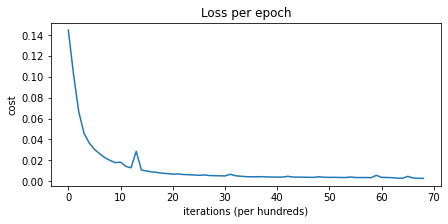

In [10]:
# plot the loss evolution
costs_ss = pd.Series(costs[1:])

plt.figure(figsize=(7, 3))
plt.plot(costs_ss)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title('Loss per epoch')
plt.show()